# 1 - Summarizing and Communicating Numbers. Lots of Numbers

In [1]:
import os
import pandas as pd
import random
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(src_path)

from src import dataframe_visualizer

In [4]:
# Read the data
df = pd.read_csv('inputs/02-1-bean-data-full-x.csv')

# Add the column name as a new record
df = pd.concat([df, df.columns.to_frame().T], ignore_index=True)

# Rename column
df.rename(columns={'219': 'guess'}, inplace=True)

# Convert guess column to int
df['guess'] = df['guess'].astype(int)

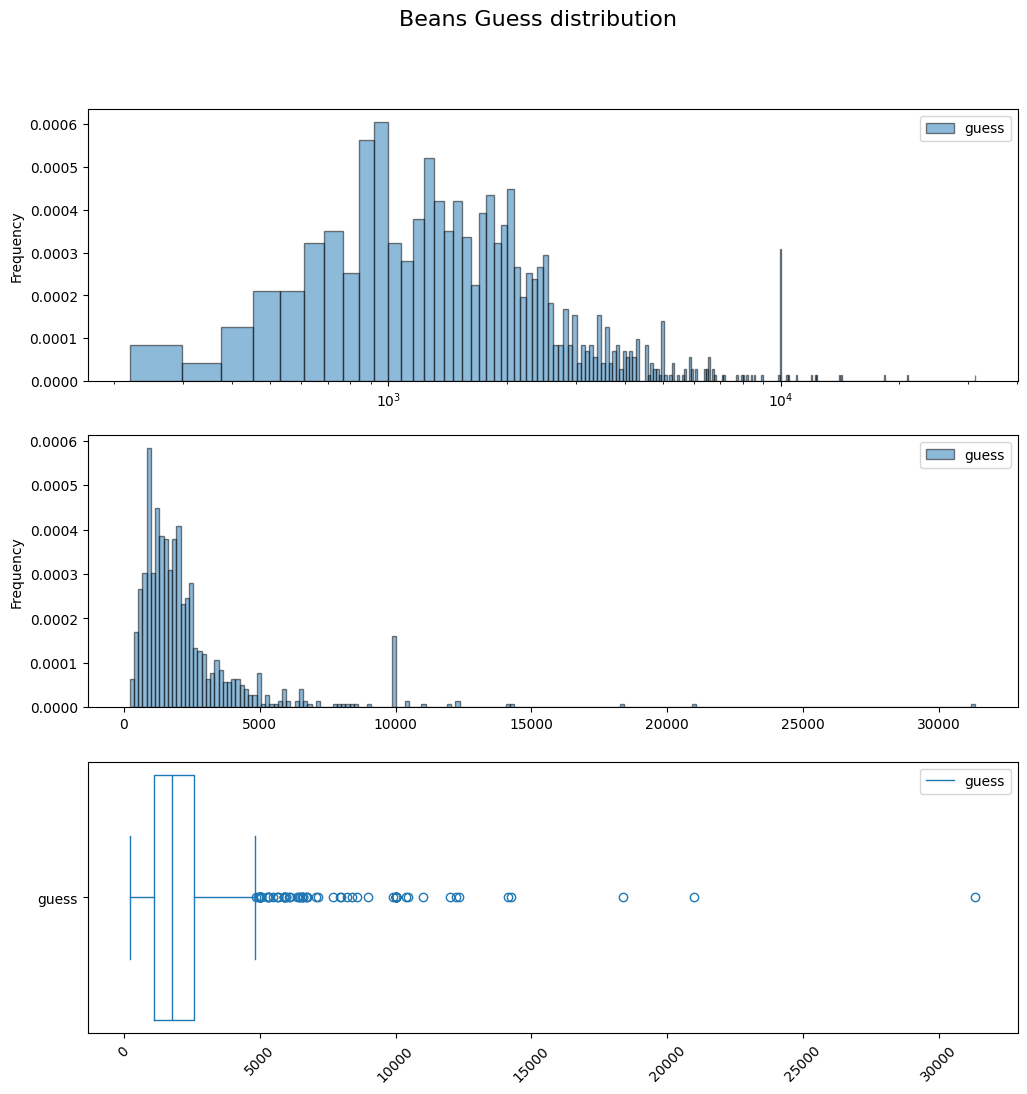

In [6]:
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'histogram',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
        'bins': 400, # default 10
    },
    {
        'plot_type': 'histogram',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
        'bins': 200, # default 10
    },
    {
        'plot_type': 'boxplot_and_whiskers',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
    },
]

figure_params = {
    'n_plots': 3, # default 1
    'fig_length': 12, # default 10
    'fig_height': 12, # default 6
    'x_rotation': 45, # default 45
    'share_x': False, # default False
    'share_y': False, # default False
    'x_limits': None, # default None
    'y_limits': None, # default None
    'log_axis': ['x',None, None], # default False
    'title': 'Beans Guess distribution' # default None
}

v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [7]:
df['guess'].describe()

count      915.000000
mean      2408.745355
std       2422.170502
min        219.000000
25%       1110.000000
50%       1775.000000
75%       2599.500000
max      31337.000000
Name: guess, dtype: float64